In [126]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline
inline_rc = dict(mpl.rcParams)

In [127]:
#################BUSINESS########################

In [128]:
app = []
with open(r'c:\Users\kasam\OneDrive\Desktop\yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json') as data:
    for i, line in enumerate(data):
        app.append(json.loads(line))
        if i+1 >= 100000:
            break
df = pd.DataFrame(app)
df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
1,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],De Forest,26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
2,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",De Forest,16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
3,LRKJF43s9-3jG9Lgx4zODg,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",True,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,7,Culver's,[],-89.374983,WI,4.5,43.251045,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",business
4,RgDg-k9S5YD_BaxMckifkg,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",True,"[Chinese, Restaurants]",De Forest,3,Chang Jiang Chinese Kitchen,[],-89.343722,WI,4.0,43.240875,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",business


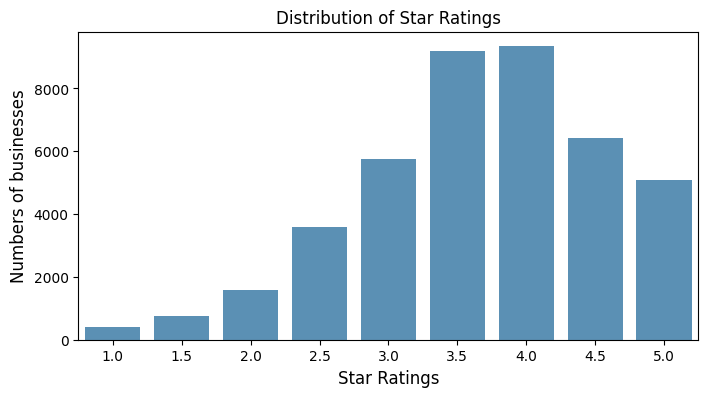

In [129]:
x = df['stars'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Distribution of Star Ratings")
plt.ylabel('Numbers of businesses', fontsize=12)
plt.xlabel('Star Ratings', fontsize=12)
plt.show()

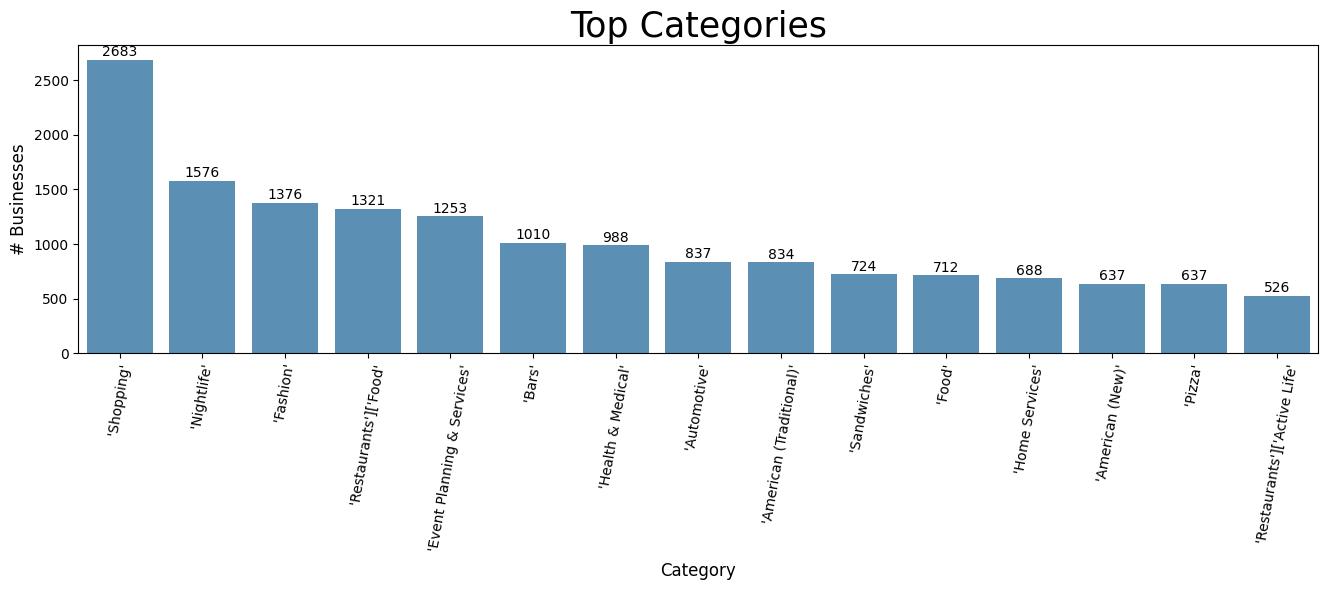

In [130]:
var = ''.join(df['categories'].astype('str'))
cats = pd.DataFrame(var.split(','), columns=['categories'])
x = cats['categories'].value_counts().sort_values(ascending=False).iloc[:15]
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Top Categories", fontsize=25)
plt.xticks(rotation=80)  
plt.ylabel('# Businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom')

plt.show()

In [131]:
df.describe()

,review_count,longitude,stars,latitude
count,42153.000000,42153.000000,42153.000000,42153.000000
mean,29.332313,-104.090080,3.674649,36.528631
std,92.499249,28.369369,0.886985,5.824484
min,3.000000,-115.369725,1.000000,32.876638
25%,4.000000,-115.136180,3.000000,33.476439
50%,8.000000,-112.068200,3.500000,33.678615
75%,21.000000,-111.882427,4.500000,36.142107
max,4084.000000,-3.050088,5.000000,56.033777


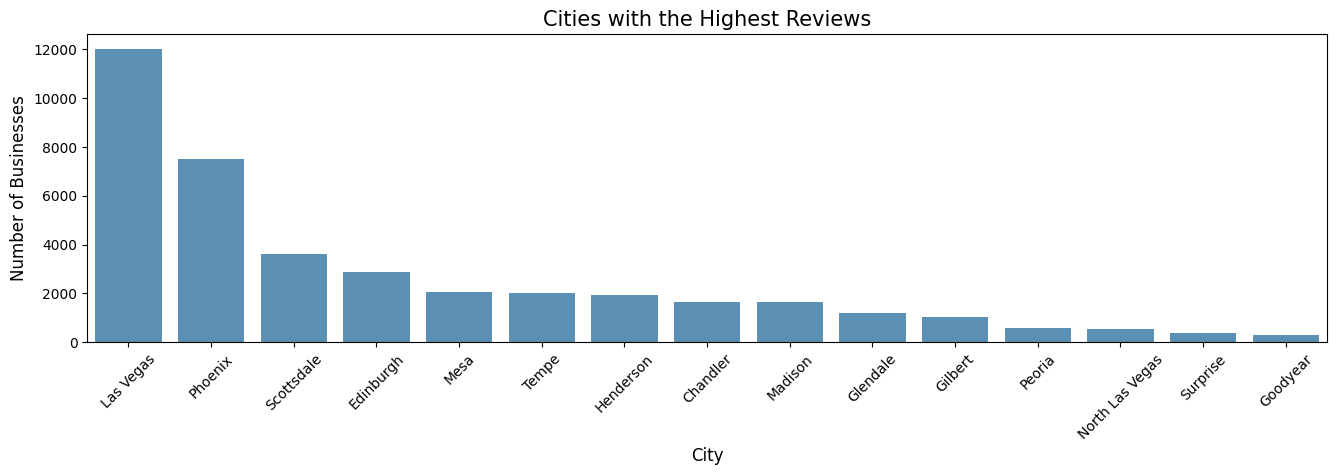

In [132]:
x = df['city'].value_counts().sort_values(ascending=False).iloc[:15]
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Cities with the Highest Reviews", fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Number of Businesses', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.show()

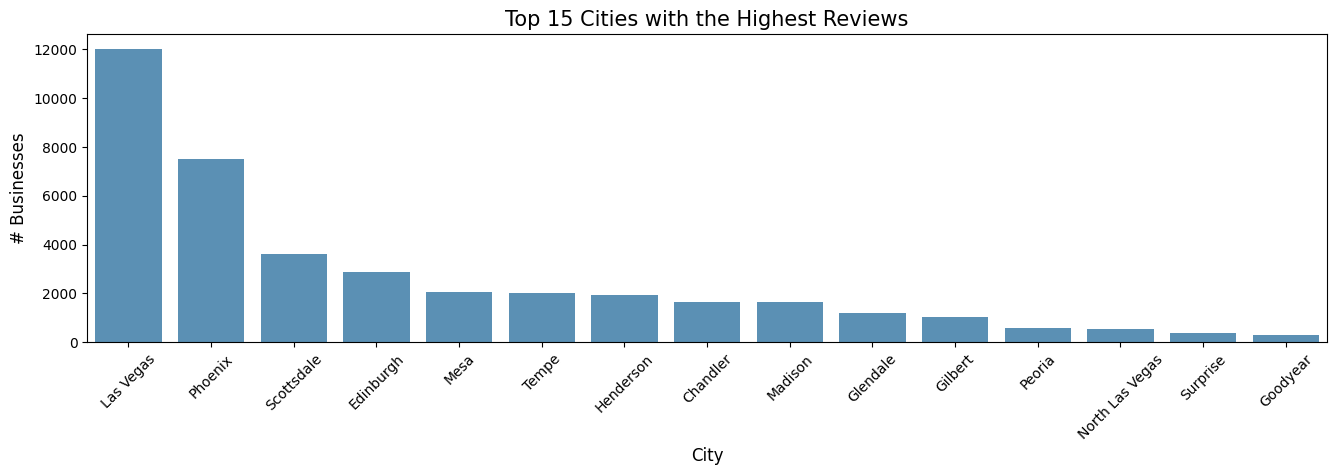

In [133]:
# Get the distribution of the number of reviews per city for the top 15 cities
x = df['city'].value_counts().sort_values(ascending=False).iloc[:15]
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Top 15 Cities with the Highest Reviews", fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('# Businesses', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.show()

In [134]:
#################REVIEW########################

In [135]:
app1 = []
with open(r'c:\Users\kasam\OneDrive\Desktop\yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json') as data1:
    for i, line in enumerate(data1):
        app1.append(json.loads(line))
        if i+1 >= 100000:
            break
df = pd.DataFrame(app1)
df.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 2, 'cool': 1}",Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,5,2007-05-17,dr. goldberg offers everything i look for in a...,review,vcNAWiLM4dR7D2nwwJ7nCA
1,"{'funny': 0, 'useful': 2, 'cool': 0}",H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,2,2010-03-22,"Unfortunately, the frustration of being Dr. Go...",review,vcNAWiLM4dR7D2nwwJ7nCA
2,"{'funny': 0, 'useful': 1, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,4,2012-02-14,Dr. Goldberg has been my doctor for years and ...,review,vcNAWiLM4dR7D2nwwJ7nCA
3,"{'funny': 0, 'useful': 0, 'cool': 0}",KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,4,2012-03-02,Been going to Dr. Goldberg for over 10 years. ...,review,vcNAWiLM4dR7D2nwwJ7nCA
4,"{'funny': 0, 'useful': 2, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,4,2012-05-15,Got a letter in the mail last week that said D...,review,vcNAWiLM4dR7D2nwwJ7nCA


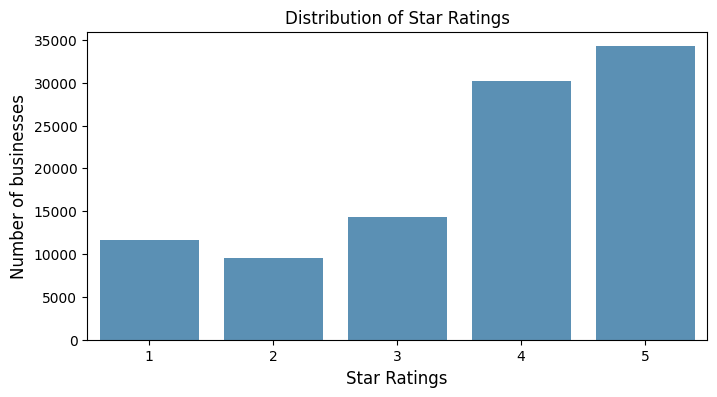

In [136]:
x = df['stars'].value_counts().sort_index()

plt.figure(figsize=(8,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Distribution of Star Ratings")
plt.ylabel('Number of businesses', fontsize=12)
plt.xlabel('Star Ratings', fontsize=12)
plt.show()